In [2]:
%pip install rasterio

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
    --------------------------------------- 0.5/25.4 MB 5.6 MB/s eta 0:00:05
   --- ------------------------------------ 2.1/25.4 MB 7.3 MB/s eta 0:00:04
   ----- ---------------------------------- 3.7/25.4 MB 7.5 MB/s eta 0:00:03
   ------- -------------------------------- 4.5/25.4 MB 6.5 MB/s eta 0:00:04
   --------- ------------------------------ 5.8/25.4 MB 6.3 MB/s eta 0:00:04
   ----------- ---------------------------- 7.3/25.4 MB 6.7 MB/s eta 0:00:03
   -------------- ------------------------- 8.9/25.4 MB 6.8 MB/s eta 0:00:03
   ---------------- ----------------------- 10.5/25.4 MB 7.0 MB/s eta 0:00:03
   ------------------ --------------------- 12.1/25.4 MB 7.1 MB/s eta 0:00:02
   -------------------- ------------------- 13.1/25.4 MB 7.1 MB/s eta 0:00:02
   ----------------------- ---------------- 15.2/25.4 MB 7.1 MB/s eta 0:00:02
   ---


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from PIL import Image
import numpy as np

In [25]:
tif_path = "test_2.tif"
label_path = "test_2.png"

In [26]:
# --- Load the .tif satellite image ---
with rasterio.open(tif_path) as src:
    image = src.read()  # shape: (bands, height, width)
    # Transpose to (H, W, C) for visualization
    image = np.transpose(image, (1, 2, 0))

# Normalize for display (if pixel values are large)
if image.dtype != np.uint8:
    image = (255 * (image - image.min()) / (image.max() - image.min())).astype(np.uint8)

# --- Load the label (mask) ---
label = np.array(Image.open(label_path))

c:\Users\motaw\AppData\Local\Programs\Python\Python312\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


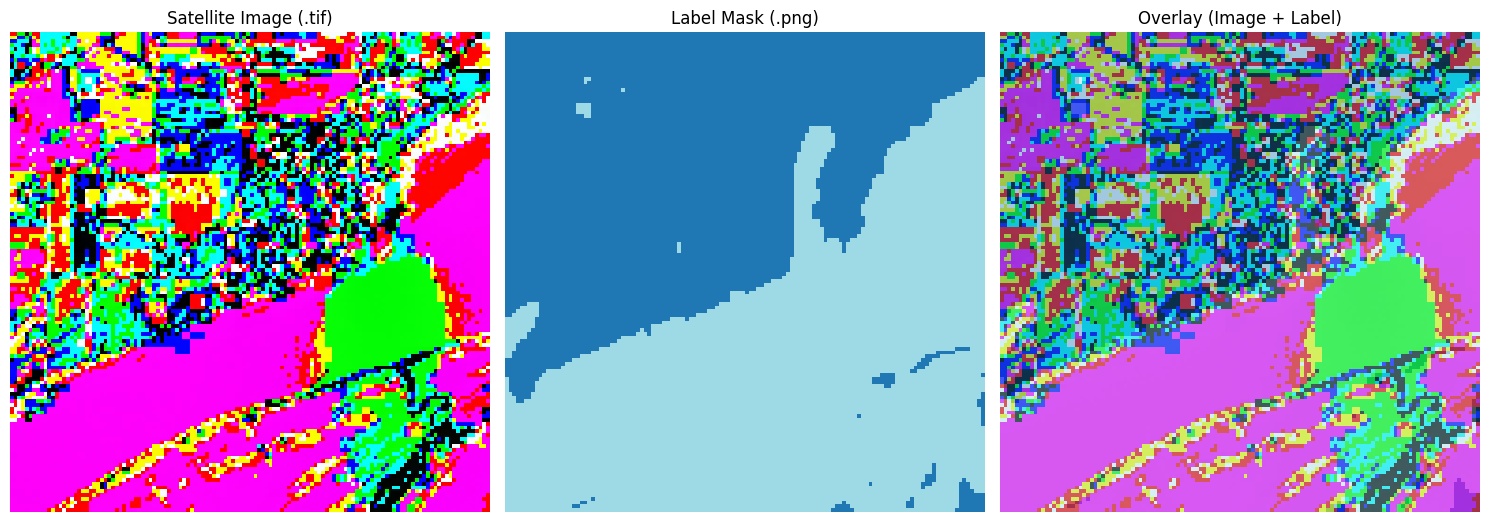

In [30]:
# --- Visualization ---
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# 1) Satellite image
if image.shape[2] >= 3:
    axes[0].imshow(image[:, :, :3])  # RGB channels
else:
    axes[0].imshow(image[:, :, 0], cmap="gray")
axes[0].set_title("Satellite Image (.tif)")
axes[0].axis("off")

# 2) Label mask
axes[1].imshow(label, cmap="tab20")
axes[1].set_title("Label Mask (.png)")
axes[1].axis("off")

# 3) Overlay
if image.shape[2] >= 3:
    axes[2].imshow(image[:, :, :3])
else:
    axes[2].imshow(image[:, :, 0], cmap="gray")
axes[2].imshow(label, cmap="tab20", alpha=0.4)
axes[2].set_title("Overlay (Image + Label)")
axes[2].axis("off")

plt.tight_layout()
plt.show()


c:\Users\motaw\AppData\Local\Programs\Python\Python312\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


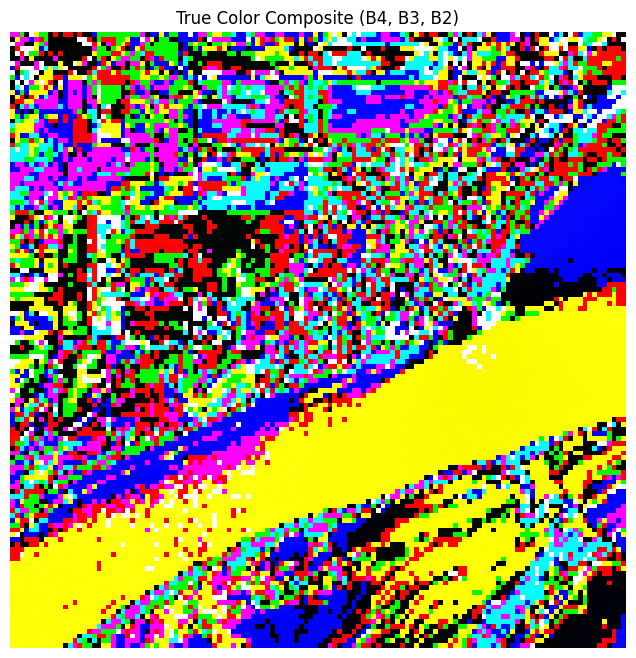

In [31]:
with rasterio.open(tif_path) as src:
    # Read bands 4, 3, 2 (Red, Green, Blue)
    image = src.read([4, 3, 2])
    image = np.transpose(image, (1, 2, 0))

# Normalize for display
image = (255 * (image - image.min()) / (image.max() - image.min())).astype(np.uint8)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title("True Color Composite (B4, B3, B2)")
plt.axis("off")
plt.show()


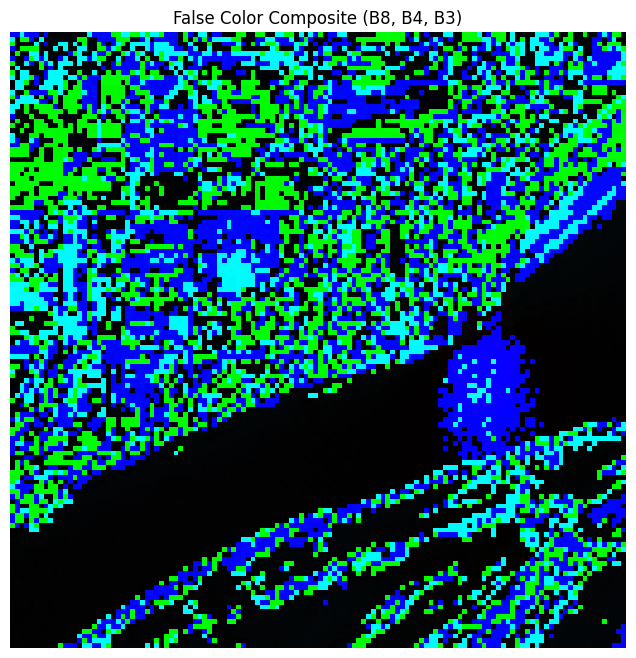

In [32]:
with rasterio.open(tif_path) as src:
    image = src.read([8, 4, 3])  # NIR, Red, Green
    image = np.transpose(image, (1, 2, 0))

image = (255 * (image - image.min()) / (image.max() - image.min())).astype(np.uint8)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title("False Color Composite (B8, B4, B3)")
plt.axis("off")
plt.show()


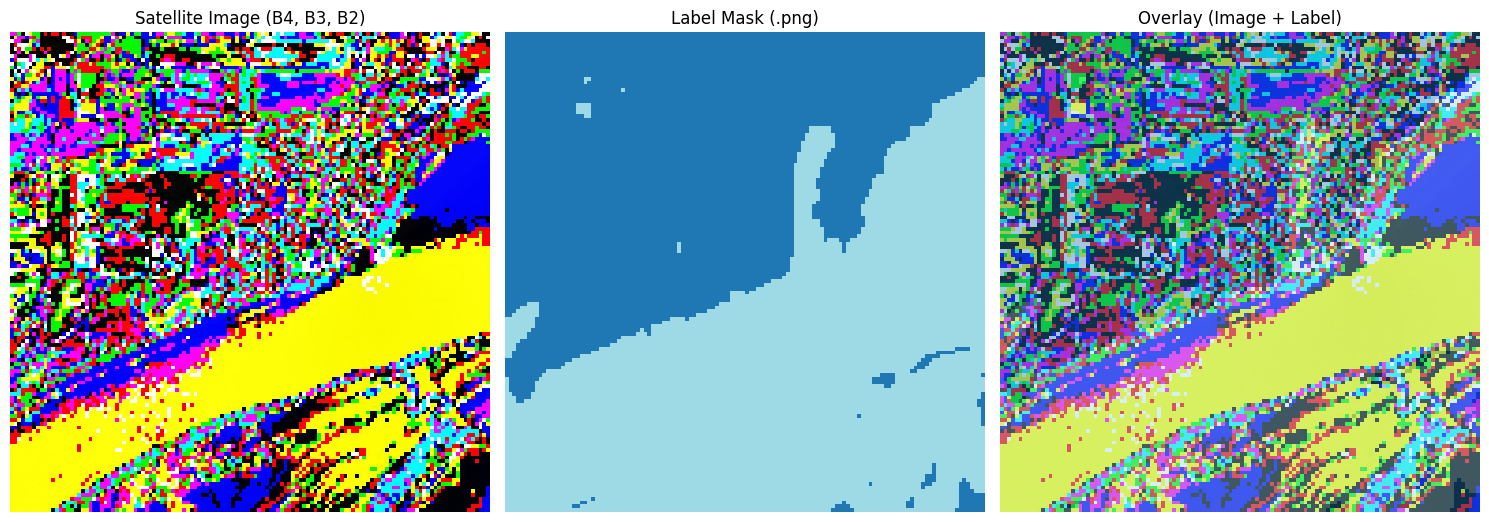

In [33]:
# --- Load satellite image (Sentinel-2: True Color B4-B3-B2) ---
with rasterio.open(tif_path) as src:
    # Read bands [4,3,2] → Red, Green, Blue
    image = src.read([4, 3, 2])
    image = np.transpose(image, (1, 2, 0))

# Normalize to 0-255 for display
image = (255 * (image - image.min()) / (image.max() - image.min())).astype(np.uint8)

# --- Load label mask ---
label = np.array(Image.open(label_path))

# --- Visualization ---
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# 1) True color satellite image
axes[0].imshow(image)
axes[0].set_title("Satellite Image (B4, B3, B2)")
axes[0].axis("off")

# 2) Label mask
axes[1].imshow(label, cmap="tab20")
axes[1].set_title("Label Mask (.png)")
axes[1].axis("off")

# 3) Overlay (satellite + label)
axes[2].imshow(image)
axes[2].imshow(label, cmap="tab20", alpha=0.4)
axes[2].set_title("Overlay (Image + Label)")
axes[2].axis("off")

plt.tight_layout()
plt.show()